In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar as cld

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['legend.facecolor'] = 'black'
plt.rcParams['legend.edgecolor'] = 'white'

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_1=pd.read_csv("/content/drive/MyDrive/DA Certificates/Online Shopping/CUSTOMERS.csv")

In [ ]:
dataset_2=pd.read_csv("/content/drive/MyDrive/DA Certificates/Online Shopping/ORDERS.csv")

In [ ]:
dataset_3=pd.read_csv("/content/drive/MyDrive/DA Certificates/Online Shopping/PAYMENTS.csv")

In [ ]:
dataset_4=pd.read_csv("/content/drive/MyDrive/DA Certificates/Online Shopping/PRODUCTS.csv")

In [ ]:
dataset_5=pd.read_csv("/content/drive/MyDrive/DA Certificates/Online Shopping/SELLER.csv")

In [ ]:
dataset_6=pd.read_csv("/content/drive/MyDrive/DA Certificates/Online Shopping/ORDER_ITEMS.csv")

In [ ]:
print(dataset_1.shape)
print(dataset_2.shape)
print(dataset_3.shape)
print(dataset_4.shape)
print(dataset_5.shape)
print(dataset_6.shape)


(99441, 5)
(99441, 8)
(103886, 5)
(32951, 9)
(3095, 4)
(112650, 7)


In [ ]:
print(dataset_1.head(5))
print(dataset_2.head(5))
print(dataset_3.head(5))
print(dataset_4.head(5))
print(dataset_5.head(5))
print(dataset_6.head(5))

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cd

In [ ]:
print(dataset_1.info())
print(dataset_2.info())
print(dataset_3.info())
print(dataset_4.info())
print(dataset_5.info())
print(dataset_6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  obje

Unique Cities


In [ ]:
unique_city = dataset_1['customer_city'].unique()
print(unique_city)

['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']


In [ ]:
city_count=dataset_1['customer_city'].nunique()
print(city_count)

4119


In [ ]:
dataset_2['order_purchase_timestamp'] = pd.to_datetime(dataset_2['order_purchase_timestamp'], format='%d-%m-%Y %H:%M')

In [ ]:
order_count_in_2017 = dataset_2[(dataset_2['order_purchase_timestamp'].dt.year == 2017)].shape[0]
print(order_count_in_2017)

45101


In [ ]:
p_oi_data = pd.merge(dataset_4,dataset_6,on='product_id')
total_sales_per_category=p_oi_data.groupby('product category')['price'].sum().sort_values(ascending=False)
print(total_sales_per_category)

product category
HEALTH BEAUTY                  1258681.34
Watches present                1205005.68
bed table bath                 1036988.68
sport leisure                   988048.97
computer accessories            911954.32
                                  ...    
flowers                           1110.04
House Comfort 2                    760.27
cds music dvds                     730.00
Fashion Children's Clothing        569.85
insurance and services             283.29
Name: price, Length: 73, dtype: float64


In [ ]:
Total_revenue = dataset_3['payment_value'].sum()
print(Total_revenue)

16008872.12


In [ ]:
installment_order_percentage = 100*(dataset_3['payment_installments'][dataset_3['payment_installments']>1].count()/dataset_3['payment_installments'].count())
print(installment_order_percentage)

49.41763086460158


In [ ]:
non_installment_order_percentage = 100*(dataset_3['payment_installments'][dataset_3['payment_installments']==1].count()/dataset_3['payment_installments'].count())
print(non_installment_order_percentage)

50.58044394817396


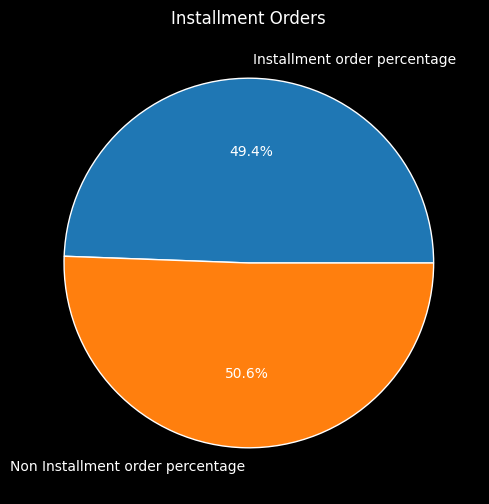

In [ ]:
data_labels = [installment_order_percentage,non_installment_order_percentage]
plt.figure(figsize=(6,6))
plt.title("Installment Orders")
plt.pie(data_labels,labels=['Installment order percentage','Non Installment order percentage'], autopct="%1.1f%%")
plt.show()

In [ ]:
statewise_customer_count=dataset_1.groupby('customer_state')['customer_id'].count().reset_index()
print(statewise_customer_count)


   customer_state  customer_id
0              AC           81
1              AL          413
2              AM          148
3              AP           68
4              BA         3380
5              CE         1336
6              DF         2140
7              ES         2033
8              GO         2020
9              MA          747
10             MG        11635
11             MS          715
12             MT          907
13             PA          975
14             PB          536
15             PE         1652
16             PI          495
17             PR         5045
18             RJ        12852
19             RN          485
20             RO          253
21             RR           46
22             RS         5466
23             SC         3637
24             SE          350
25             SP        41746
26             TO          280


/tmp/ipython-input-30-1499252032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='customer_state',y='customer_id',data=statewise_customer_count.reset_index(),palette='viridis')


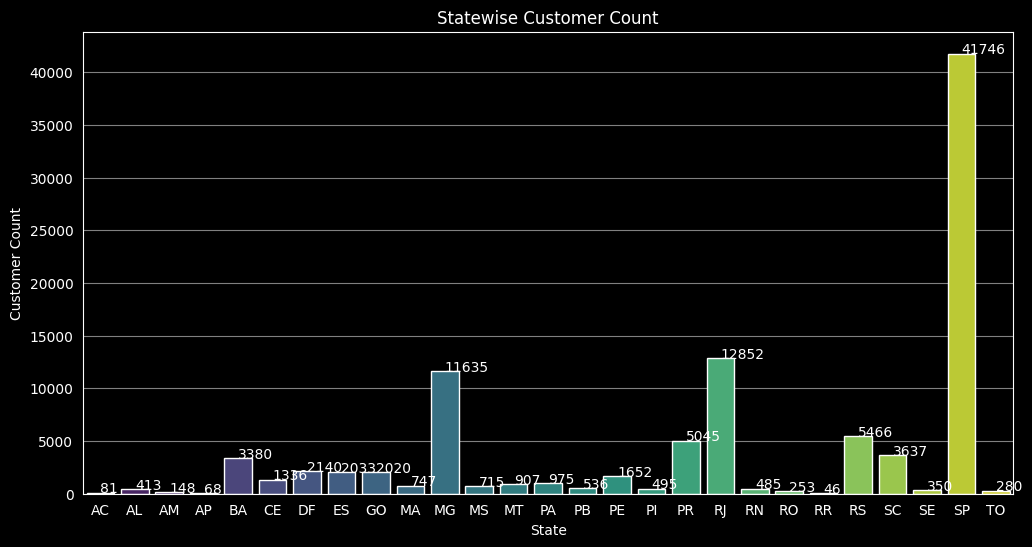

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x='customer_state',y='customer_id',data=statewise_customer_count.reset_index(),palette='viridis')
plt.title('Statewise Customer Count')
plt.xlabel('State')
plt.ylabel('Customer Count')
for x,y in zip(statewise_customer_count['customer_state'],statewise_customer_count['customer_id']):
  ax.text(x,y,f'{y:.0f}',color='white',fontsize=10)
plt.show()

In [ ]:
Monthwise_order_2018=dataset_2[(dataset_2['order_purchase_timestamp'].dt.year == 2018)].groupby(dataset_2['order_purchase_timestamp'].dt.strftime('%B'))['order_id'].count()
print(Monthwise_order_2018)

order_purchase_timestamp
April        6939
August       6512
February     6728
January      7269
July         6292
June         6167
March        7211
May          6873
October         4
September      16
Name: order_id, dtype: int64


<Axes: ylabel='order_purchase_timestamp'>

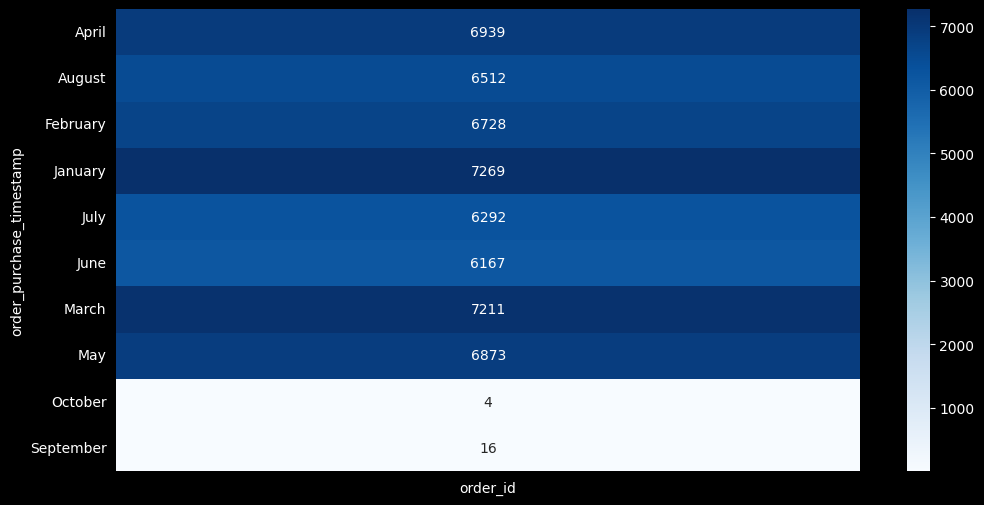

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(Monthwise_order_2018.to_frame(),annot=True,cmap='Blues',fmt='g')

In [ ]:
Cus_ord_merge=pd.merge(dataset_1,dataset_2,on ='customer_id')
oi_cus_ord_merge=pd.merge(Cus_ord_merge,dataset_6,on='order_id')





In [ ]:
order_counts = oi_cus_ord_merge.groupby(['customer_city', 'order_id'])['product_id'].count().reset_index(name='product_count')
average_number_of_product_per_order_grouped_by_customer_city = order_counts.groupby('customer_city')['product_count'].mean().round(2)

print(average_number_of_product_per_order_grouped_by_customer_city)


customer_city
abadia dos dourados    1.00
abadiania              1.00
abaete                 1.00
abaetetuba             1.27
abaiara                1.00
                       ... 
xinguara               1.11
xique-xique            1.00
zacarias               1.00
ze doca                1.00
zortea                 1.00
Name: product_count, Length: 4110, dtype: float64


In [ ]:
categorywise_revenue_percentage=((total_sales_per_category/dataset_6['price'].sum())*100).round(2)
print(categorywise_revenue_percentage.head(10))

product category
HEALTH BEAUTY           9.26
Watches present         8.87
bed table bath          7.63
sport leisure           7.27
computer accessories    6.71
Furniture Decoration    5.37
Cool Stuff              4.67
housewares              4.65
automotive              4.36
Garden tools            3.57
Name: price, dtype: float64


<Axes: ylabel='product category'>

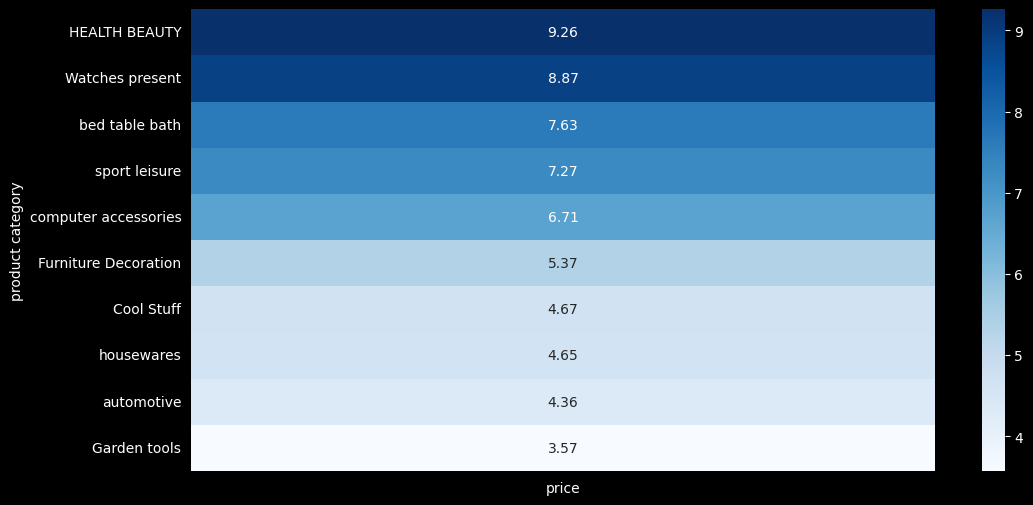

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(categorywise_revenue_percentage.head(10).to_frame(),annot=True,cmap='Blues',fmt='g')

In [ ]:
oi_seller_merge=pd.merge(dataset_6,dataset_5,on='seller_id')
revenue_by_seller=oi_seller_merge.groupby('seller_id')['price'].sum().sort_values(ascending=False).reset_index()
revenue_by_seller['rank']=revenue_by_seller['price'].rank(method='dense',ascending=False)
print(revenue_by_seller.head(10))

                          seller_id      price  rank
0  4869f7a5dfa277a7dca6462dcf3b52b2  229472.63   1.0
1  53243585a1d6dc2643021fd1853d8905  222776.05   2.0
2  4a3ca9315b744ce9f8e9374361493884  200472.92   3.0
3  fa1c13f2614d7b5c4749cbc52fecda94  194042.03   4.0
4  7c67e1448b00f6e969d365cea6b010ab  187923.89   5.0
5  7e93a43ef30c4f03f38b393420bc753a  176431.87   6.0
6  da8622b14eb17ae2831f4ac5b9dab84a  160236.57   7.0
7  7a67c85e85bb2ce8582c35f2203ad736  141745.53   8.0
8  1025f0e2d44d7041d6cf58b6550e0bfa  138968.55   9.0
9  955fee9216a65b617aa5c0531780ce60  135171.70  10.0


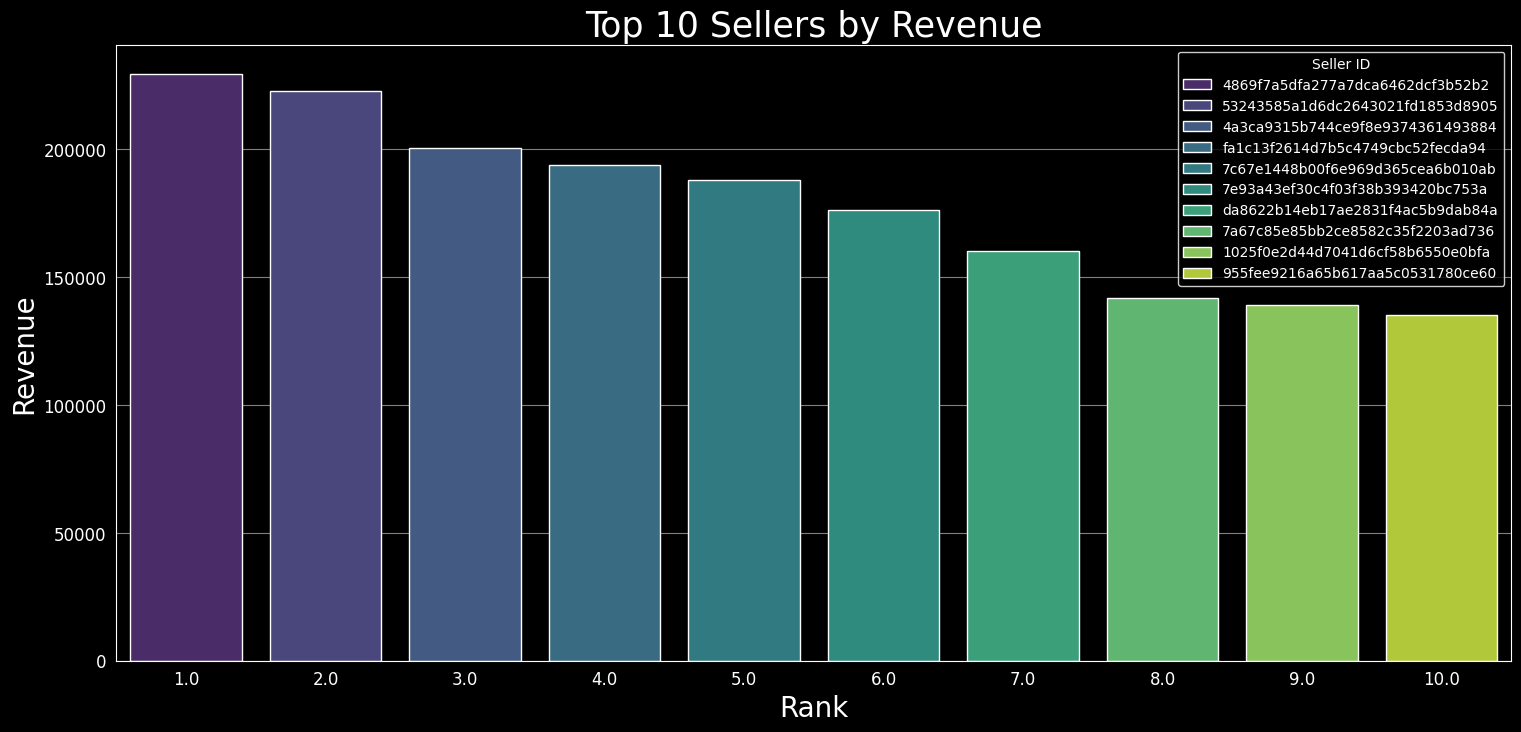

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x='rank',y='price',hue='seller_id',data=revenue_by_seller.head(10),palette='viridis')
plt.title('Top 10 Sellers by Revenue',fontsize=25)
plt.xlabel('Rank',fontsize=20)
plt.ylabel('Revenue',fontsize=20)
plt.legend(title='Seller ID',fontsize=10)
plt.tick_params(axis='both', which='major',labelsize=12)
plt.show()

In [ ]:
payment_orders_merge = dataset_2[dataset_2['order_delivered_customer_date'].notna()].merge(dataset_3, on='order_id').sort_values(by='order_delivered_customer_date')
payment_orders_merge

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
28720,8edbc0b60816d6644dbe422dedc06681,111fbf59e7bf74622feb0006b74c4286,delivered,2017-12-18 18:51:00,18-12-2017 20:30,20-12-2017 19:25,01-01-2018 05:47,16-01-2018 00:00,1,credit_card,1,285.14
15541,d81dff089ae648dacea746f77643f86e,5e6c17c1aac5a1acf6e38746eeebc11d,delivered,2017-01-24 22:16:00,24-01-2017 22:25,26-01-2017 10:19,01-02-2017 00:47,17-02-2017 00:00,1,credit_card,10,910.60
836,7ab9c55c59eaeea579d047e2d8aaed81,feca0f935fcce79dd42d409d96af9645,delivered,2017-01-22 13:04:00,25-01-2017 02:55,26-01-2017 16:41,01-02-2017 00:52,16-03-2017 00:00,1,UPI,1,22.46
76298,4a571f5e71e16ce232386c80d485db65,a08c3f511f37158bd7e1964e6efafa2a,delivered,2017-01-19 10:17:00,19-01-2017 10:30,23-01-2017 11:19,01-02-2017 01:05,03-03-2017 00:00,1,credit_card,1,49.72
83545,58c851c107a9a3e21e03a9e2a1951d12,12b9ed9bc1f4f6648dab5fe7324a3d58,delivered,2017-01-23 22:39:00,23-01-2017 22:50,25-01-2017 10:56,01-02-2017 09:04,20-03-2017 00:00,1,credit_card,4,374.28
...,...,...,...,...,...,...,...,...,...,...,...,...
87558,c21e26a623796821b827547ac056684c,8a4e02df6c9e3dd7e603d1a1face907e,delivered,2017-11-25 15:58:00,25-11-2017 16:31,29-11-2017 20:36,31-12-2017 09:26,03-01-2018 00:00,1,credit_card,3,65.62
94716,0e457aee274ec7e2e18d25ab6d212921,c4666d6a182f4846e0ea4a35e23dd4b3,delivered,2017-12-12 15:26:00,12-12-2017 15:50,13-12-2017 21:17,31-12-2017 12:09,10-01-2018 00:00,1,credit_card,6,169.44
98055,f668e8674ac35dcc80c2c00708daa430,95d4a8aad28fc10255379db381d7a677,delivered,2017-12-15 21:26:00,15-12-2017 21:39,18-12-2017 15:54,31-12-2017 12:28,12-01-2018 00:00,1,credit_card,6,184.00
71780,eef1b5385bc2d6cdf899eaf1337be979,4e87ee70b31e161d2bccbcb0af7c035a,delivered,2017-12-10 10:45:00,10-12-2017 10:55,11-12-2017 19:38,31-12-2017 13:06,11-01-2018 00:00,1,credit_card,3,35.69


In [ ]:
payment_orders_merge['order_delivered_customer_date']=pd.to_datetime(payment_orders_merge['order_delivered_customer_date'], format='%d-%m-%Y %H:%M')


In [ ]:
customer_orders =payment_orders_merge[['order_id', 'customer_id', 'order_delivered_customer_date', 'payment_value']]
print(customer_orders)

                               order_id                       customer_id  \
28720  8edbc0b60816d6644dbe422dedc06681  111fbf59e7bf74622feb0006b74c4286   
15541  d81dff089ae648dacea746f77643f86e  5e6c17c1aac5a1acf6e38746eeebc11d   
836    7ab9c55c59eaeea579d047e2d8aaed81  feca0f935fcce79dd42d409d96af9645   
76298  4a571f5e71e16ce232386c80d485db65  a08c3f511f37158bd7e1964e6efafa2a   
83545  58c851c107a9a3e21e03a9e2a1951d12  12b9ed9bc1f4f6648dab5fe7324a3d58   
...                                 ...                               ...   
87558  c21e26a623796821b827547ac056684c  8a4e02df6c9e3dd7e603d1a1face907e   
94716  0e457aee274ec7e2e18d25ab6d212921  c4666d6a182f4846e0ea4a35e23dd4b3   
98055  f668e8674ac35dcc80c2c00708daa430  95d4a8aad28fc10255379db381d7a677   
71780  eef1b5385bc2d6cdf899eaf1337be979  4e87ee70b31e161d2bccbcb0af7c035a   
2994   884fc1672d7c26265ce8f3b2e2369b32  138a01aa92239376fe0599ebb07a2c1e   

      order_delivered_customer_date  payment_value  
28720           2018-0

In [ ]:
customer_orders['moving_avg'] = customer_orders.groupby('customer_id')['payment_value'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)
print(customer_orders)

                               order_id                       customer_id  \
28720  8edbc0b60816d6644dbe422dedc06681  111fbf59e7bf74622feb0006b74c4286   
15541  d81dff089ae648dacea746f77643f86e  5e6c17c1aac5a1acf6e38746eeebc11d   
836    7ab9c55c59eaeea579d047e2d8aaed81  feca0f935fcce79dd42d409d96af9645   
76298  4a571f5e71e16ce232386c80d485db65  a08c3f511f37158bd7e1964e6efafa2a   
83545  58c851c107a9a3e21e03a9e2a1951d12  12b9ed9bc1f4f6648dab5fe7324a3d58   
...                                 ...                               ...   
87558  c21e26a623796821b827547ac056684c  8a4e02df6c9e3dd7e603d1a1face907e   
94716  0e457aee274ec7e2e18d25ab6d212921  c4666d6a182f4846e0ea4a35e23dd4b3   
98055  f668e8674ac35dcc80c2c00708daa430  95d4a8aad28fc10255379db381d7a677   
71780  eef1b5385bc2d6cdf899eaf1337be979  4e87ee70b31e161d2bccbcb0af7c035a   
2994   884fc1672d7c26265ce8f3b2e2369b32  138a01aa92239376fe0599ebb07a2c1e   

      order_delivered_customer_date  payment_value  moving_avg  
28720     

<ipython-input-35-ab0817f32406>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_orders['moving_avg'] = customer_orders.groupby('customer_id')['payment_value'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)


In [ ]:
payment_orders_merge['Order_Year']=payment_orders_merge['order_delivered_customer_date'].dt.year
payment_orders_merge['Order_Month_Num']=payment_orders_merge['order_delivered_customer_date'].dt.month
payment_orders_merge['Order_Month']=payment_orders_merge['order_delivered_customer_date'].dt.strftime('%B')
monthly_sales = payment_orders_merge.groupby(['Order_Year', 'Order_Month_Num', 'Order_Month'])['payment_value'].sum().reset_index()
monthly_sales=monthly_sales.sort_values(by=['Order_Year','Order_Month_Num'])
print(monthly_sales)

    Order_Year  Order_Month_Num Order_Month  payment_value
0         2016               10     October       34953.78
1         2016               11    November       11376.19
2         2016               12    December         960.85
3         2017                1     January       38708.63
4         2017                2    February      228152.25
5         2017                3       March      387275.32
6         2017                4       April      307722.84
7         2017                5         May      600917.76
8         2017                6        June      502197.97
9         2017                7        July      531271.71
10        2017                8      August      627367.19
11        2017                9   September      670205.77
12        2017               10     October      759903.98
13        2017               11    November      754862.96
14        2017               12    December     1102232.62
15        2018                1     January      993588.

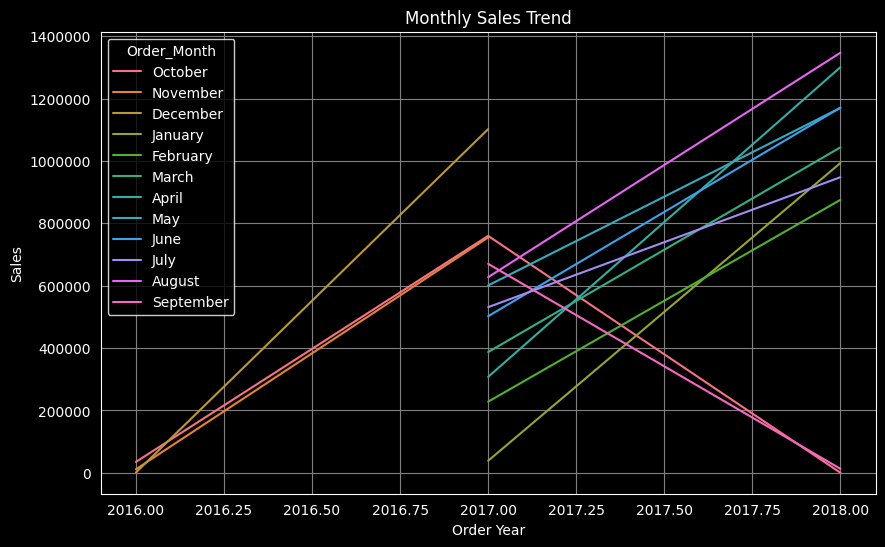

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.lineplot(x='Order_Year',y='payment_value',data=monthly_sales,hue='Order_Month')
plt.title('Monthly Sales Trend')
plt.xlabel('Order Year')
plt.ylabel('Sales')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [ ]:
monthly_sales['cumulative_sales']=monthly_sales['payment_value'].cumsum()
print(monthly_sales)

    Order_Year  Order_Month_Num Order_Month  payment_value  cumulative_sales
0         2016               10     October       34953.78          34953.78
1         2016               11    November       11376.19          46329.97
2         2016               12    December         960.85          47290.82
3         2017                1     January       38708.63          85999.45
4         2017                2    February      228152.25         314151.70
5         2017                3       March      387275.32         701427.02
6         2017                4       April      307722.84        1009149.86
7         2017                5         May      600917.76        1610067.62
8         2017                6        June      502197.97        2112265.59
9         2017                7        July      531271.71        2643537.30
10        2017                8      August      627367.19        3270904.49
11        2017                9   September      670205.77        3941110.26

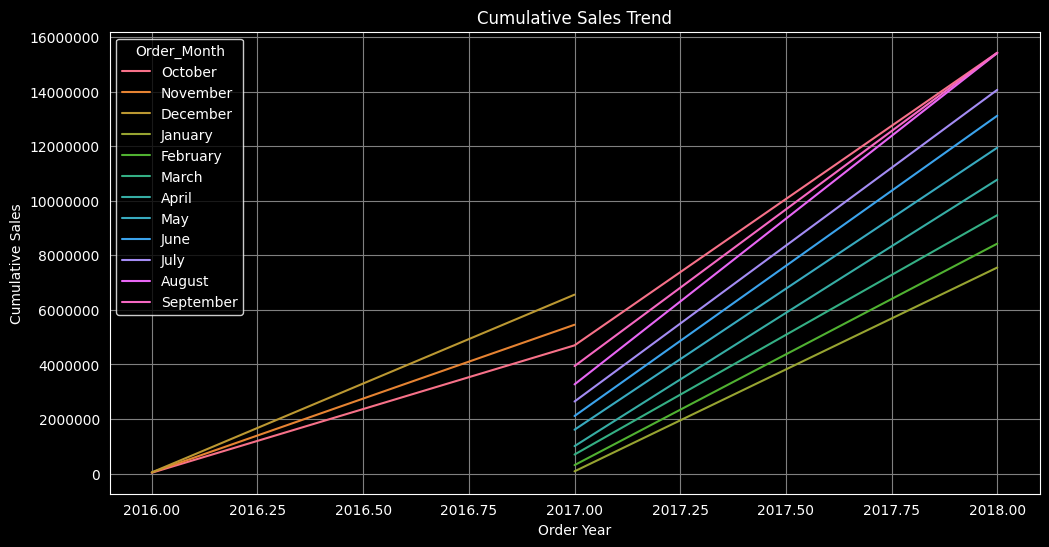

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x='Order_Year',y='cumulative_sales',data=monthly_sales,hue='Order_Month')
plt.title('Cumulative Sales Trend')
plt.xlabel('Order Year')
plt.ylabel('Cumulative Sales')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [ ]:
Year_over_Year_growth_rate=(monthly_sales.groupby('Order_Year')['payment_value'].sum().pct_change()*100).reset_index()
print(Year_over_Year_growth_rate.fillna(0).round(2))

   Order_Year  payment_value
0        2016           0.00
1        2017       13667.62
2        2018          36.14


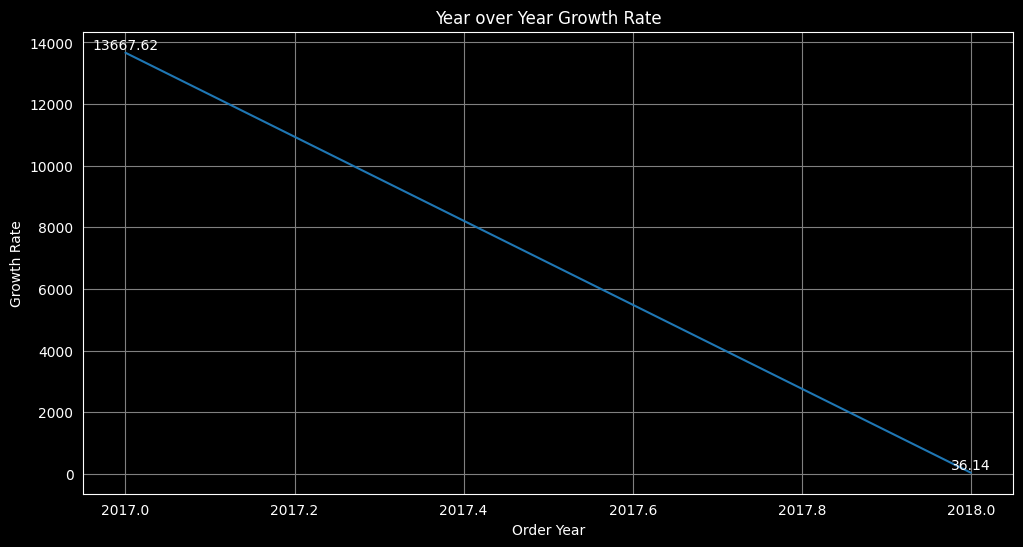

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x='Order_Year',y='payment_value',data=Year_over_Year_growth_rate)
plt.title('Year over Year Growth Rate')
plt.xlabel('Order Year')
plt.ylabel('Growth Rate')
for x, y in zip(Year_over_Year_growth_rate['Order_Year'], Year_over_Year_growth_rate['payment_value']):
    ax.text(x, y, f'{y:.2f}', color='white', fontsize=10, ha='center', va='bottom')
plt.show()

In [ ]:
payment_orders_merge['Order_Year'] = payment_orders_merge['order_delivered_customer_date'].dt.year
customer_yearly_spending = payment_orders_merge.groupby(['Order_Year', 'customer_id'])['payment_value'].sum().reset_index()
top_customers = customer_yearly_spending.sort_values(['Order_Year', 'payment_value'], ascending=[True, False])
top_3_customers_per_year = top_customers.groupby('Order_Year').head(3)

print(top_3_customers_per_year)


       Order_Year                       customer_id  payment_value
180          2016  a9dc96b027d1252bbac0a9b72d837fc6        1423.55
32           2016  1fc56719b52f82c03caddc5faf531fbb         982.41
138          2016  85f0e92957e9fb9c5f72ba5378f492a0         979.91
3798         2017  1617b1357756262bfa56ab541c47bc16       13664.08
32144        2017  c6e2731c5b391845f6800c97401a43a9        6929.31
10460        2017  3fd6777bbce08a352fddd04e4a7cc8f6        6726.66
92312        2018  ec5b2ba62e574342386871631fafd3fc        7274.88
94072        2018  f48d464a0baaea338cb25f816991ab1f        6922.21
54553        2018  3d979689f636322c62418b6346b1c6d2        4681.78


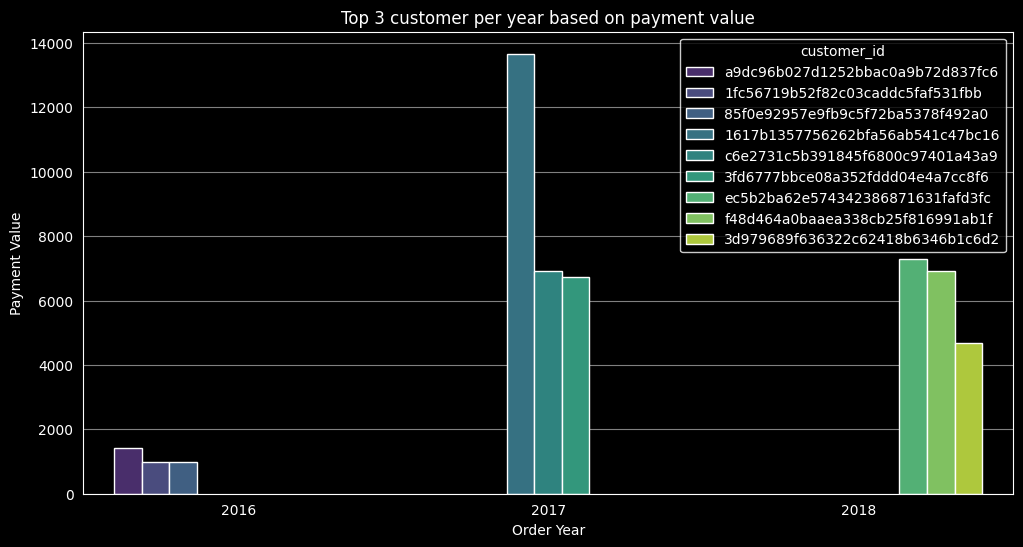

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Order_Year',y='payment_value',hue='customer_id',data=top_3_customers_per_year,palette='viridis')
plt.title('Top 3 customer per year based on payment value')
plt.xlabel('Order Year')
plt.ylabel('Payment Value')
plt.show()